In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import *
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

df = pd.read_csv("df_final_01.csv")


In [2]:

temp_cols = [col for col in df.columns if ( col.startswith("TEXT") or col.startswith("TINT")) ]


if "heating_status" in df.columns:
    temp_cols.append("heating_status")


cluster_col = next((col for col in df.columns if col.startswith("clust")), None)

if cluster_col is None:
    raise ValueError("Aucune colonne de cluster trouvée.")


X = df[temp_cols].drop(columns=["heating_status"]) 
y = df[cluster_col]  



In [3]:


def standardize_data(X):
    scaler = StandardScaler()
    return scaler.fit_transform(X)

In [4]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "SVC": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

In [5]:
def evaluate_models_split(X_train, X_test, y_train, y_test , models):
  
    
    results = {}
    
    for name, model in models.items():
        print(f"\n Évaluation de {name} avec train_test_split...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        cm = confusion_matrix(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        accuracy = accuracy_score(y_test, y_pred) 

        results[name] = {"f1_score": f1, "accuracy": accuracy}
        
        plt.figure(figsize=(5,4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
        plt.xlabel('Prédictions')
        plt.ylabel('Vraies classes')
        plt.title(f'Matrice de confusion - {name}')
        plt.show()
        
        print(f"{name} - Accuracy: {accuracy:.4f} - F1 Score: {f1:.4f}")
        print("###################################################################")
    
    return results


In [6]:


def evaluate_models_cv(X, y, models, cv=4):
    results = {}

    for name, model in models.items():
        print(f"\n Évaluation de {name} avec Cross Validation ({cv}-folds)...")

        scoring = ["accuracy", "f1_weighted"]
        scores = {}

        for metric in scoring:
            score = cross_val_score(model, X, y, cv=StratifiedKFold(n_splits=cv, shuffle=True, random_state=42), scoring=metric)
            scores[metric] = np.mean(score)  
        results[name] = scores

        print(f"{name} - Accuracy: {scores['accuracy']:.4f} - F1 Score: {scores['f1_weighted']:.4f}")
        print("###################################################################")

    return results


In [7]:
X_norm=standardize_data(X)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)


 Évaluation de Random Forest avec train_test_split...


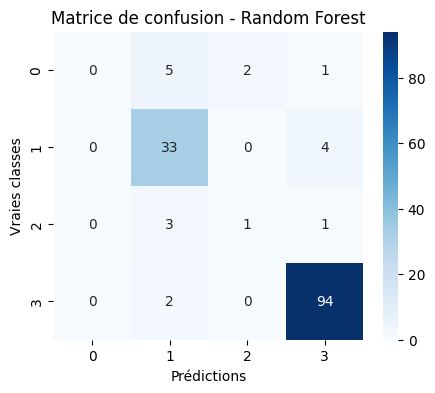

Random Forest - Accuracy: 0.8767 - F1 Score: 0.8483
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


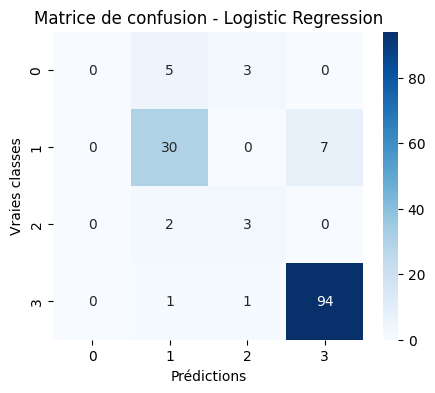

Logistic Regression - Accuracy: 0.8699 - F1 Score: 0.8474
###################################################################

 Évaluation de SVC avec train_test_split...


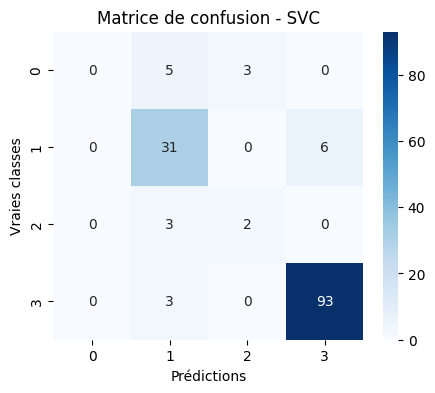

SVC - Accuracy: 0.8630 - F1 Score: 0.8398
###################################################################

 Évaluation de KNN avec train_test_split...


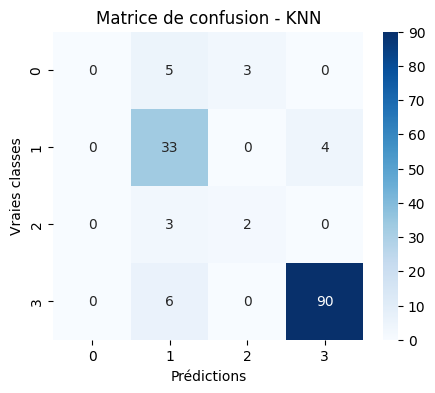

KNN - Accuracy: 0.8562 - F1 Score: 0.8357
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


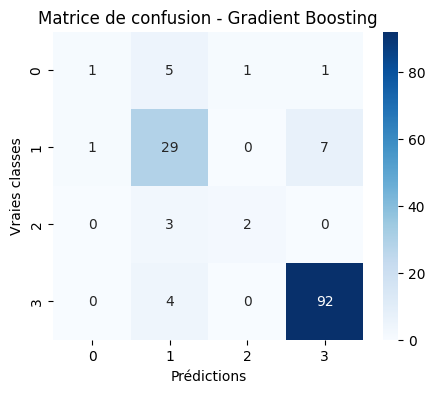

Gradient Boosting - Accuracy: 0.8493 - F1 Score: 0.8338
###################################################################


In [8]:
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)

In [16]:
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)


 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.8805 - F1 Score: 0.8742
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.8626 - F1 Score: 0.8541
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.8860 - F1 Score: 0.8727
###################################################################

 Évaluation de KNN avec Cross Validation (4-folds)...
KNN - Accuracy: 0.8750 - F1 Score: 0.8704
###################################################################

 Évaluation de Gradient Boosting avec Cross Validation (4-folds)...
Gradient Boosting - Accuracy: 0.8819 - F1 Score: 0.8751
###################################################################


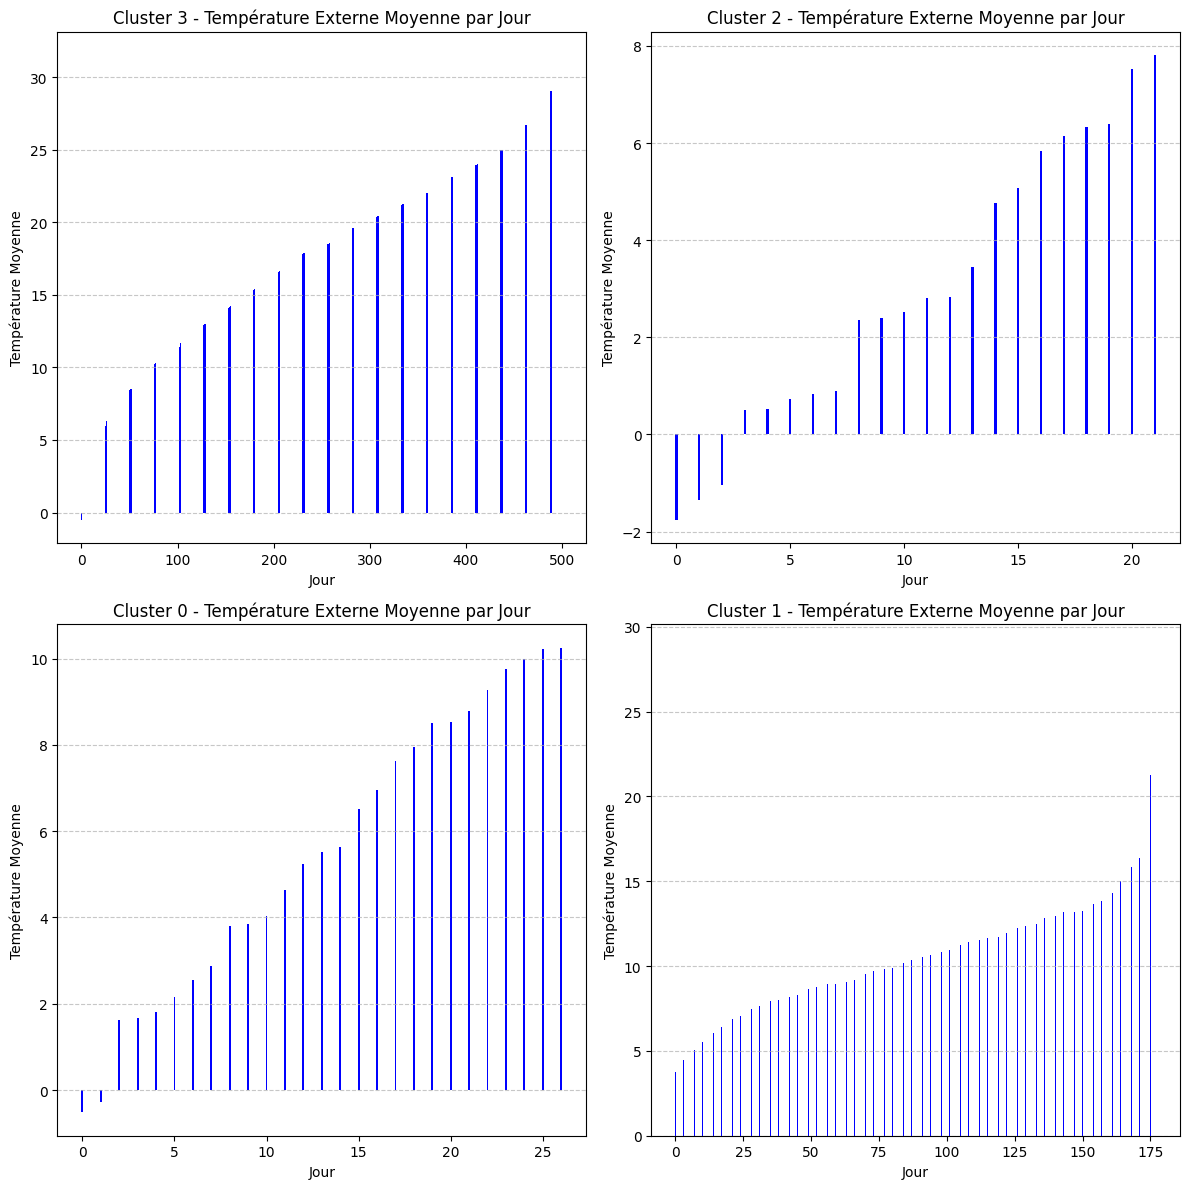

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("df_final_01.csv")


temp_ext_cols = [col for col in df.columns if col.startswith("TEXT")]


temp_ext_data = df[temp_ext_cols].copy()


temp_ext_data['temp_ext_mean'] = temp_ext_data.mean(axis=1)
temp_ext_data['cluster'] = df['cluster']
temp_ext_data['date'] = df['date']

fig, axs = plt.subplots(2, 2, figsize=(12, 12))


axs = axs.flatten()


bar_width = 0.1


for i, cluster in enumerate(temp_ext_data['cluster'].unique()):

    cluster_data = temp_ext_data[temp_ext_data['cluster'] == cluster]
    
    
    sorted_cluster_data = cluster_data.sort_values('temp_ext_mean')
    
    
    sorted_cluster_data = sorted_cluster_data.reset_index(drop=True)

   
    axs[i].bar(sorted_cluster_data.index, sorted_cluster_data['temp_ext_mean'], color='blue', width=bar_width)
    
    
    axs[i].set_title(f'Cluster {cluster} - Température Externe Moyenne par Jour')
    axs[i].set_xlabel('Jour')
    axs[i].set_ylabel('Température Moyenne')
    axs[i].grid(True, axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()


plt.show()


In [10]:
df_filtered = df[df["heating_status"] == 1]

text_cols = [col for col in df_filtered.columns if col.startswith("TEXT")]


if "heating_status" in df_filtered.columns:
    text_cols.append("heating_status")


cluster_col = next((col for col in df_filtered.columns if col.startswith("clust")), None)

if cluster_col is None:
    raise ValueError("Aucune colonne de cluster trouvée.")


X = df_filtered[text_cols].drop(columns=["heating_status"]) 
y = df_filtered[cluster_col]  


In [11]:
X_norm=standardize_data(X)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)


 Évaluation de Random Forest avec train_test_split...


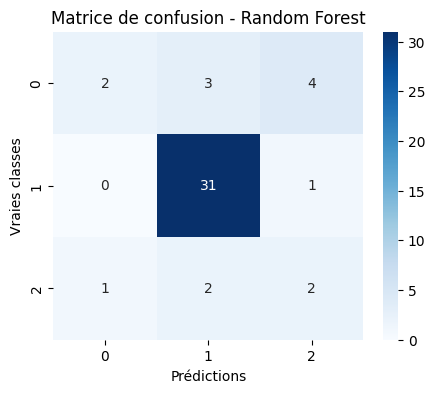

Random Forest - Accuracy: 0.7609 - F1 Score: 0.7357
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


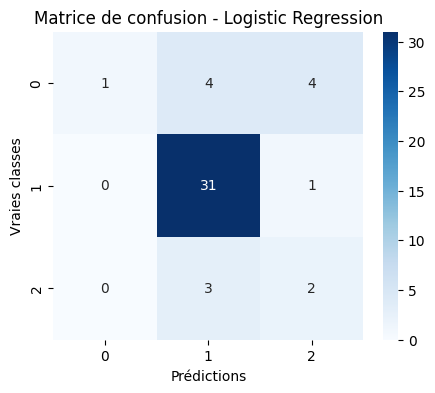

Logistic Regression - Accuracy: 0.7391 - F1 Score: 0.6915
###################################################################

 Évaluation de SVC avec train_test_split...


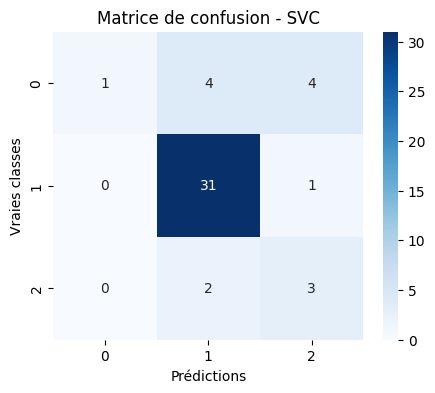

SVC - Accuracy: 0.7609 - F1 Score: 0.7144
###################################################################

 Évaluation de KNN avec train_test_split...


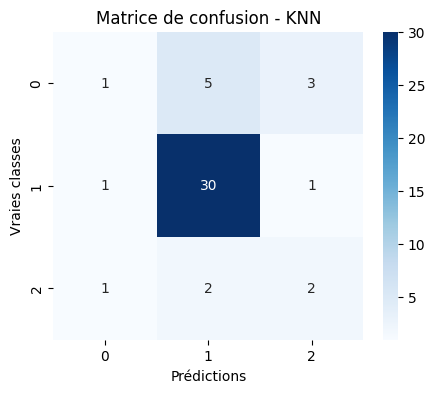

KNN - Accuracy: 0.7174 - F1 Score: 0.6770
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


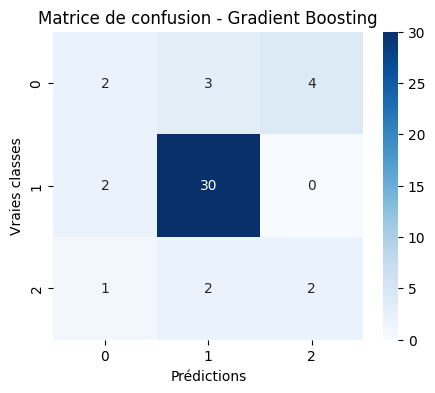

Gradient Boosting - Accuracy: 0.7391 - F1 Score: 0.7184
###################################################################


In [12]:
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)

In [13]:
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)


 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.8283 - F1 Score: 0.8091
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.8416 - F1 Score: 0.8101
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.8636 - F1 Score: 0.8297
###################################################################

 Évaluation de KNN avec Cross Validation (4-folds)...
KNN - Accuracy: 0.8415 - F1 Score: 0.8127
###################################################################

 Évaluation de Gradient Boosting avec Cross Validation (4-folds)...
Gradient Boosting - Accuracy: 0.8151 - F1 Score: 0.8047
###################################################################
